In [2]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
heights = np.random.randint(150 , 191 , size = 100)
noise = np.random.randint(-5 , 6 , size = 100)
weight = (0.5*heights-20+noise).astype(int)
df = pd.DataFrame({
    'height' : heights ,
    'weight' : weight
})

In [4]:
def mean(data) :
  return sum(data)/len(data)

def variance(data) :
  m = mean(data)
  return sum((val-m)**2 for val in data)/(len(data)-1)

def std(data) :
  return math.sqrt(variance(data))

In [5]:
def cov(x,y) :
  mx = mean(x)
  my = mean(y)
  co = 0
  co+=sum((x[i] - mx)*(y[i]-my) for i in range(len(x)))
  return co/(mx*my)

In [6]:
def lr(x,y) :
  a = cov(x,y)/variance(x)
  b = mean(y) - a*mean(x)
  return a,b

In [7]:
intersept , slope = lr(df['height'],df['weight'])
x = df['height']
y = df['weight']
print(f"mean of x  : {mean(x):.2f}")
print(f"mean of y  : {mean(y):.2f}")
print(f"variance of x  : {variance(x) : .2f}")
print(f"variance of y  : {variance(y) : .2f}")
print(f"intersept : {intersept : .2f}")
print(f"slope : {slope:.2f}")
print(f"covarience(x,y) : {cov(x,y) : .2f}")
print(f"correlation(x,y) : {cov(x,y)/(std(x)*std(y)) : .2f}\nRegression line : {slope:.2f}x+{intersept:.2f})")

mean of x  : 169.78
mean of y  : 64.04
variance of x  :  133.14
variance of y  :  44.58
intersept :  0.00
slope : 63.23
covarience(x,y) :  0.64
correlation(x,y) :  0.01
Regression line : 63.23x+0.00)


In [8]:
mat = [[variance(x) , cov(x,y)] ,
       [cov(x,y) , variance(y)]]
print("covarience matrix : ")
for row in mat :
  print([round(val , 2) for val in row])

covarience matrix : 
[133.14, np.float64(0.64)]
[np.float64(0.64), 44.58]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [10]:
data = {
    "study" : [random.randint(2,6) for _ in range(10)] ,
    "score" : [random.randint(50,100) for _ in range(10)]
}
df = pd.DataFrame(data)
x = np.column_stack((np.ones(len(df)),df['study']))
y = df['score']
x_T = x.T
theta = np.linalg.inv(x_T @ x) @ x_T @ y
print(f"theta: {theta}")
intercept = theta[0]
slope = theta[1]
print(f"intercept : {intercept : .2f}")
print(f"slope : {slope : .2f}")

theta: [49.61363636  8.02272727]
intercept :  49.61
slope :  8.02


In [11]:
print(f"linear regression using matrix\nEquation :- \nscores = {intersept :.2f} + {slope : .3f}*study")

linear regression using matrix
Equation :- 
scores = 0.00 +  8.023*study


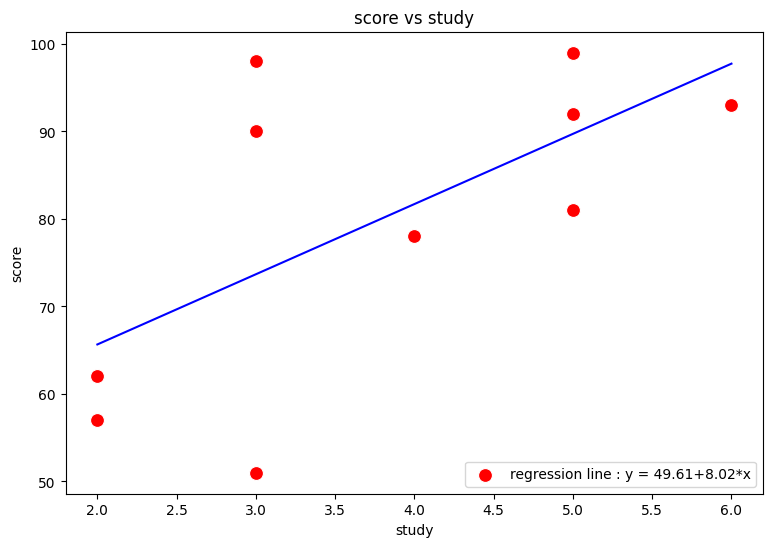

In [12]:
plt.figure(figsize = (9,6))
sns.scatterplot(x = df['study'] , y = df['score'] , data=df , s = 100 , color='red')
x_line = np.array([min(df['study']) , max(df['study'])])
y_line = slope*x_line + intercept
plt.plot(x_line , y_line , color = 'blue')
label = f'regression line : y = {intercept :.2f}+{slope :.2f}*x'
plt.title('score vs study')
plt.xlabel('study')
plt.ylabel('score')
plt.legend([label])
plt.show()

In [1]:
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['score'] , color='green')
plt.title('work hours')
plt.xlabel('work')
plt.ylabel('salary')
plt.subplot(1,2,2)
sns.boxplot( y = df['score'] , color='green')
plt.title('salary')
plt.xlabel('work')
plt.ylabel('salry')
plt.show()

NameError: name 'plt' is not defined

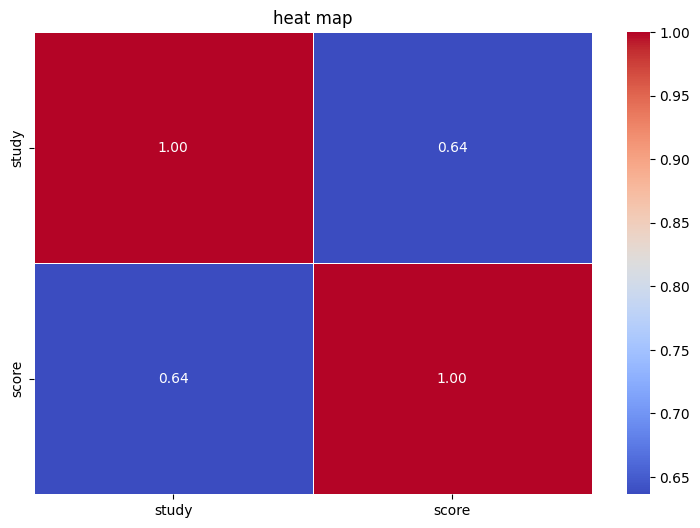

In [14]:
plt.figure(figsize = (9,6))
cor_mat = df.corr()
sns.heatmap(cor_mat , annot = True , cmap = 'coolwarm' , fmt = ".2f" , linewidths=.5 )
plt.title('heat map')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv('data.csv')
print(data.shape)
data = data.dropna()
print(data.head())
print(data.head())
x = data.drop('MEDV' , axis = 1)
y = data['MEDV']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)
model = LinearRegression()
model.fit(x_train , y_train)
msc = mean_squared_error(y_test , model.predict(x_test))
r2 = r2_score(y_test , model.predict(x_test))
rounded_coef = [round(float(c),2) for c in model.coef_]

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
5  394.12   5.21  28.7  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6

In [18]:
print(f"coefficient : {rounded_coef}")
print(f"mean squared error : {msc}")
print(f"r2 score : {r2}")
print(f"intersept : {round(float(model.intercept_) , 2)}")
sample = [0.00632, 18, 2.31,0, 0.538, 6.575,65.2, 4.09, 1,296, 15.3, 396.9, 4.98]
sdf = pd.DataFrame([sample] , columns = x.columns)
print(f"predicted price : {round(model.predict(sdf)[0],2)}")

coefficient : [-0.07, 0.04, 0.07, 2.71, -19.79, 5.25, -0.02, -1.47, 0.24, -0.01, -0.9, 0.01, -0.32]
mean squared error : 28.84987277716687
r2 score : 0.5806563123015833
intersept : 26.64
predicted price : 28.79


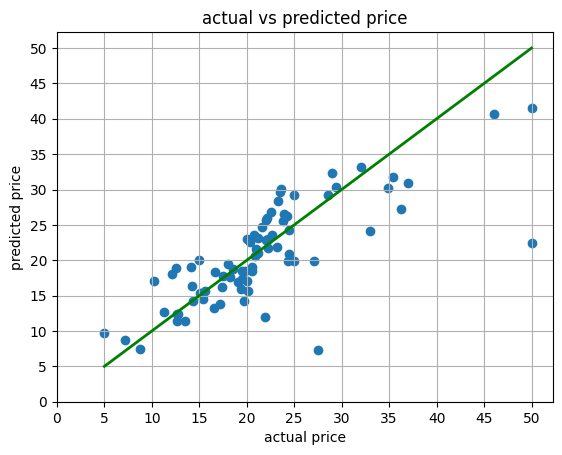

In [19]:
plt.scatter(y_test , model.predict(x_test))
plt.plot([y_test.min() , y_test.max()], [y_test.min() , y_test.max()], color='green', linewidth=2)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
max_price = max(y_test.max(), model.predict(x_test).max())
plt.xticks(np.arange(0, max_price + 5, 5))
plt.yticks(np.arange(0, max_price + 5, 5))
plt.grid(True)
plt.show()

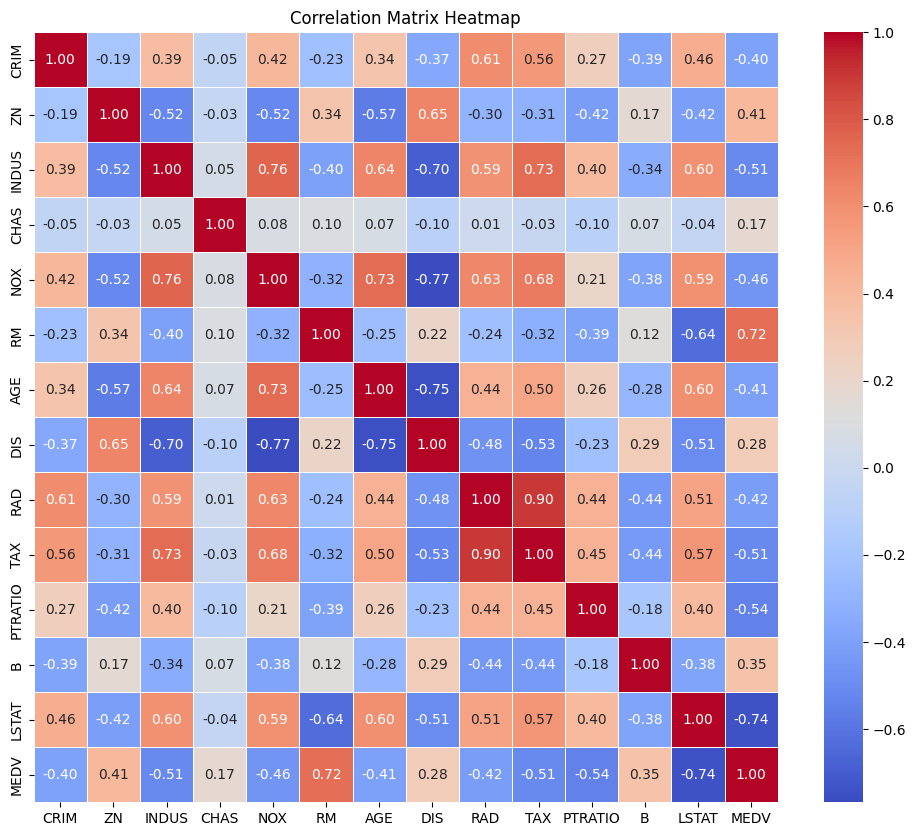

In [20]:
corr_mat = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


Highly correlated columns to drop: ['TAX']
(394, 13)


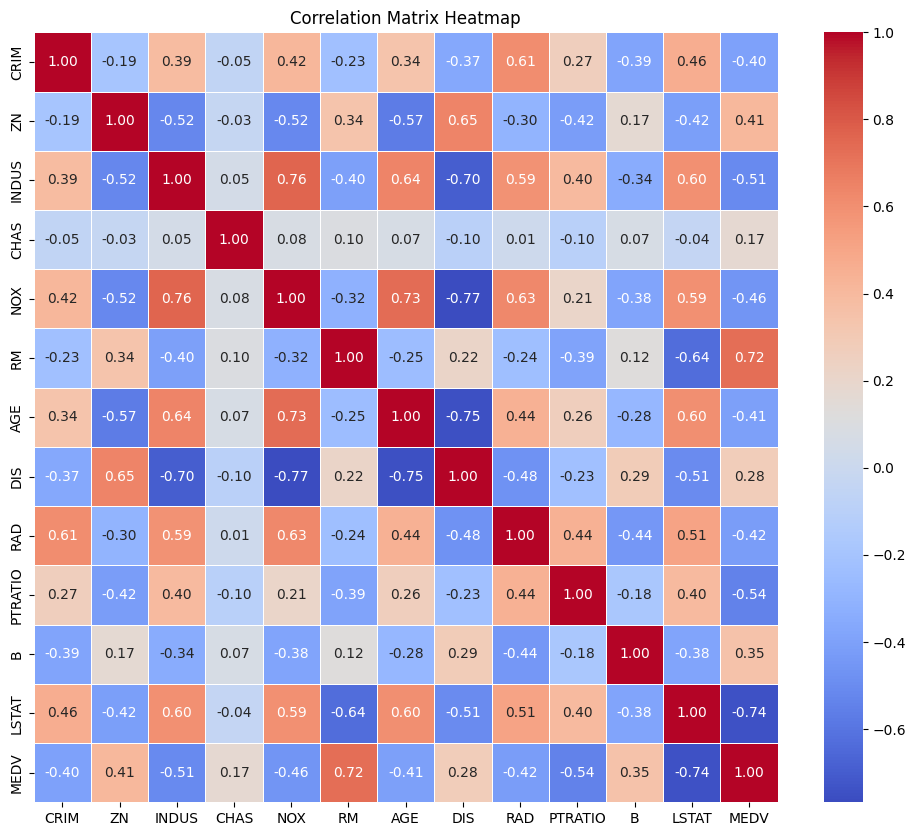

In [21]:
corr_matrix_abs = corr_mat.abs()
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.89)]
print("Highly correlated columns to drop:", to_drop)
data = data.drop(to_drop, axis=1)
print(data.shape)
corr_mat = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [22]:
model = LinearRegression()
model.fit(x_train , y_train)
msc = mean_squared_error(y_test , model.predict(x_test))
r2 = r2_score(y_test , model.predict(x_test))
print(f"coefficient : {rounded_coef}")
print(f"mean squared error : {msc}")
print(f"r2 score : {r2}")
print(f"intersept : {round(float(model.intercept_) , 2)}")
sample = [0.00632, 18, 2.31,0, 0.538, 6.575,65.2, 4.09, 1,296, 15.3, 396.9, 4.98]
sdf = pd.DataFrame([sample] , columns = x.columns)
print(f"predicted price : {round(model.predict(sdf)[0],2)}")

coefficient : [-0.07, 0.04, 0.07, 2.71, -19.79, 5.25, -0.02, -1.47, 0.24, -0.01, -0.9, 0.01, -0.32]
mean squared error : 28.84987277716687
r2 score : 0.5806563123015833
intersept : 26.64
predicted price : 28.79


In [23]:
import numpy as np
X_train = x_train.values
X_test = x_test.values
y_train_np = y_train.values.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
theta = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train_np)
y_pred_manual = X_test_bias @ theta
mse_manual = np.mean((y_test_np - y_pred_manual) ** 2)
ss_total = np.sum((y_test_np - y_test_np.mean()) ** 2)
ss_res = np.sum((y_test_np - y_pred_manual) ** 2)
r2_manual = 1 - (ss_res / ss_total)
rounded_coef_manual = [round(float(c), 2) for c in theta[1:]]
intercept_manual = round(float(theta[0]), 2)
print("\n--- Manual Linear Regression Results ---")
print(f"Manual coefficients: {rounded_coef_manual}")
print(f"Manual intercept: {intercept_manual}")
print(f"Manual MSE: {round(mse_manual, 4)}")
print(f"Manual R² score: {round(r2_manual, 4)}")


--- Manual Linear Regression Results ---
Manual coefficients: [-0.07, 0.04, 0.07, 2.71, -19.79, 5.25, -0.02, -1.47, 0.24, -0.01, -0.9, 0.01, -0.32]
Manual intercept: 26.64
Manual MSE: 28.8499
Manual R² score: 0.5807


/tmp/ipython-input-23-725806111.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rounded_coef_manual = [round(float(c), 2) for c in theta[1:]]
/tmp/ipython-input-23-725806111.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept_manual = round(float(theta[0]), 2)


In [24]:
sample = [0.00632, 18, 2.31,0, 0.538, 6.575,65.2, 4.09, 1,296, 15.3, 396.9, 4.98]
sample_np = np.array([1] + sample)
manual_prediction = sample_np @ theta
print(f"Manual predicted price for sample: {round(float(manual_prediction), 2)}")

Manual predicted price for sample: 28.79


/tmp/ipython-input-24-3382787194.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Manual predicted price for sample: {round(float(manual_prediction), 2)}")


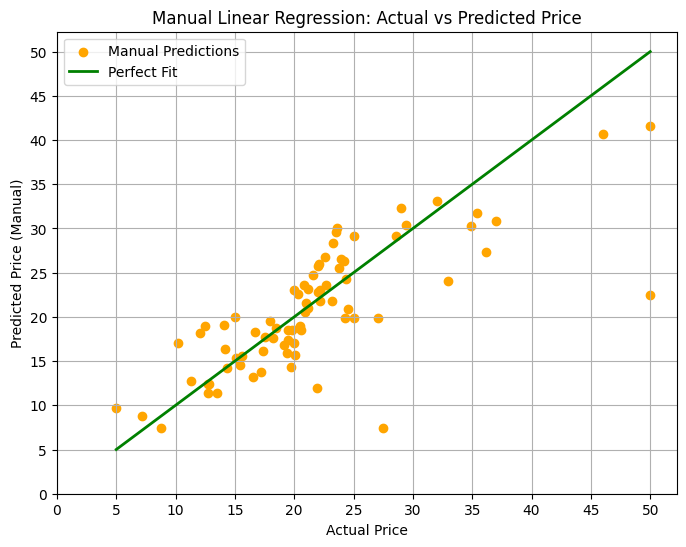

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_manual, color='orange', label='Manual Predictions')
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         color='green', linewidth=2, label='Perfect Fit')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Manual)')
plt.title('Manual Linear Regression: Actual vs Predicted Price')
plt.xticks(np.arange(0, max(y_test_np.max(), y_pred_manual.max()) + 5, 5))
plt.yticks(np.arange(0, max(y_test_np.max(), y_pred_manual.max()) + 5, 5))
plt.legend()
plt.grid(True)
plt.show()